# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import time

# Import API key
from config import OpenWeatherMap_API_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
# Save config information.

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = cities[0]

# Build partial query URL

query_url = f"{url}appid={OpenWeatherMap_API_key}&units={units}&q={city}"

In [49]:
# Checking for the proper URL syntax
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=7878f3d01ced56c5b79fa2b648ea3498&units=imperial&q=rikitea'

In [111]:
response = requests.get(query_url).json()

In [51]:
# Doing a request for a single city and pretty printing the output to see the output

response = requests.get(query_url).json()

# Create variable for latitude
latitude = response['coord']['lat']
# Create variable for longitude
longitude = response['coord']['lon']
# Create variable for temperature
temperature = response['main']['temp']
# Create variable for MAX temperature
max_temperature = response['main']['temp_max']
# Create variable for humiidity
humidity = response['main']['humidity']
# Create variable for cloudiness
cloud = response['clouds']['all']
# Create variable for wind speed
wind_speed = response['wind']['speed']

In [52]:
scatter_weather_df = pd.DataFrame([{'City':city,
                                    'Latitude':latitude,
                                    "Longitude": longitude,
                                    'Temperature': temperature,
                                    'Max Temperature': max_temperature,
                                    'Humidity': humidity,
                                    'Cloudiness': cloud,
                                    'Wind Speed': wind_speed}])

In [54]:
# Run a for loop to circle thru cities



for city in cities[1:]:
    
    query_url = f"{url}appid={OpenWeatherMap_API_key}&units={units}&q={city}"
    response = requests.get(query_url).json()
    
    if response['cod'] == 200:    
        # Create variable for latitude
        latitude = response['coord']['lat']
        #Create variable for longitude
        longitude =  response['coord']['lon']
        # Create variable for temperature
        temperature = response['main']['temp']
        # Create variable for MAX temperature
        max_temperature = response['main']['temp_max']
        # Create variable for humidity
        humidity = response['main']['humidity']
        # Create variable for cloudiness
        cloud = response['clouds']['all']
        # Create variable for wind speed
        wind_speed = response['wind']['speed']

        scatter_weather_df = scatter_weather_df.append(pd.DataFrame([{'City':city,
                                    'Latitude': latitude,
                                    'Longitude': longitude,                                                                      
                                    'Temperature': temperature,
                                    'Max Temperature': max_temperature,                                  
                                    'Humidity': humidity,
                                    'Cloudiness': cloud,
                                    'Wind Speed': wind_speed}]))
    
    
    # time.sleep causes a program to pause   
    time.sleep(1)
    
# Export scatter_weather DataFrame to a CSV file
scatter_weather_df.to_csv("scatter_weather.csv", index=False, header=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
 # Make a reference to the scatter_weather.csv file path
scatter_weather = "scatter_weather.csv"

# Import the books.csv file as a DataFrame
scat_weather_df = pd.read_csv(scatter_weather)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

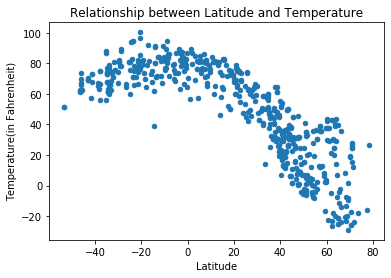

In [74]:
scat_weather_df.plot.scatter(x='Latitude', y='Temperature', title= "Relationship between Latitude and Temperature");
plt.ylabel("Temperature(in Fahrenheit)")
plt.show(block=True);

#### Latitude vs. Humidity Plot

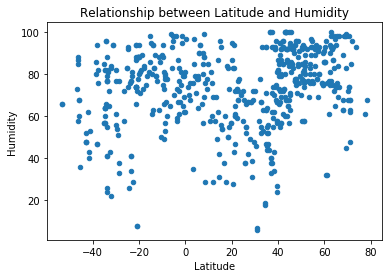

In [113]:
scat_weather_df.plot.scatter(x='Latitude', y='Humidity', title= "Relationship between Latitude and Humidity");
plt.ylabel("Humidity")
plt.show(block=True);

#### Latitude vs. Cloudiness Plot

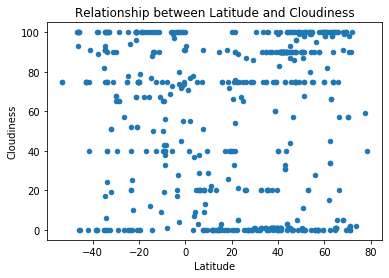

In [114]:
scat_weather_df.plot.scatter(x='Latitude', y='Cloudiness', title= "Relationship between Latitude and Cloudiness");
plt.ylabel("Cloudiness")
plt.show(block=True);

#### Latitude vs. Wind Speed Plot

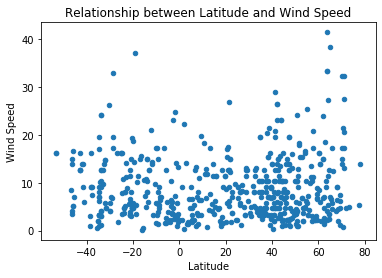

In [115]:
scat_weather_df.plot.scatter(x='Latitude', y='Wind Speed', title= "Relationship between Latitude and Wind Speed");
plt.ylabel("Wind Speed")
plt.show(block=True);

## Linear Regression

In [78]:
# OPTIONAL: Create a function to create Linear Regression plots


In [83]:
# Filter out lattude values greater than zero create a Northern Hemisphere dataframe
northern_hemi_df = scat_weather_df[scat_weather_df['Latitude']>=0]

In [82]:
# Filter out lattude values greater than zero create a Northern Hemisphere dataframe
southern_hemi_df = scat_weather_df[scat_weather_df['Latitude']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

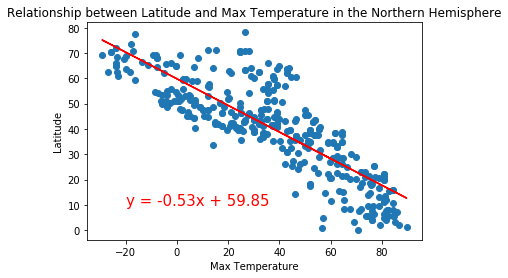

In [118]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Max Temperature']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.title('Relationship between Latitude and Max Temperature in the Northern Hemisphere')
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

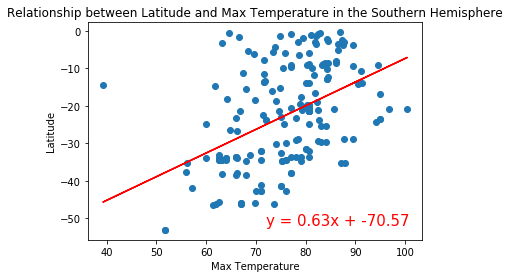

In [119]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Max Temperature']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,-52),fontsize=15,color="red")
plt.title('Relationship between Latitude and Max Temperature in the Southern Hemisphere')
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

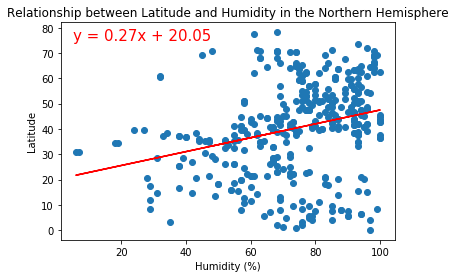

In [123]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,75),fontsize=15,color="red")
plt.title('Relationship between Latitude and Humidity in the Northern Hemisphere')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

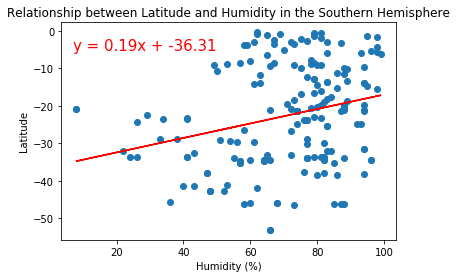

In [122]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,-5),fontsize=15,color="red")
plt.title('Relationship between Latitude and Humidity in the Southern Hemisphere')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

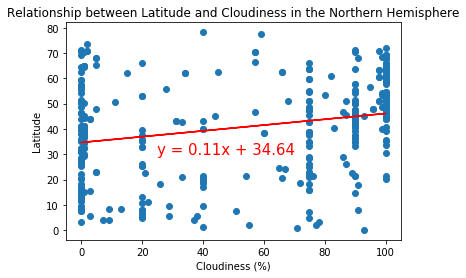

In [124]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.title('Relationship between Latitude and Cloudiness in the Northern Hemisphere')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

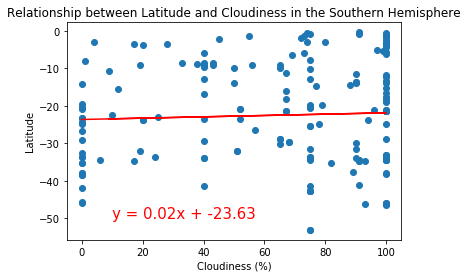

In [125]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-50),fontsize=15,color="red")
plt.title('Relationship between Latitude and Cloudiness in the Southern Hemisphere')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

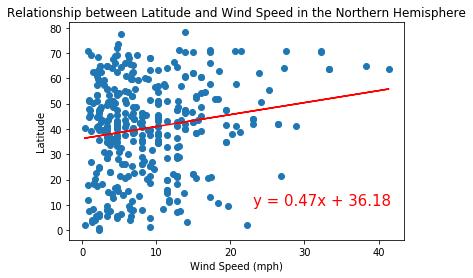

In [126]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(23,10),fontsize=15,color="red")
plt.title('Relationship between Latitude and Wind Speed in the Northern Hemisphere')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

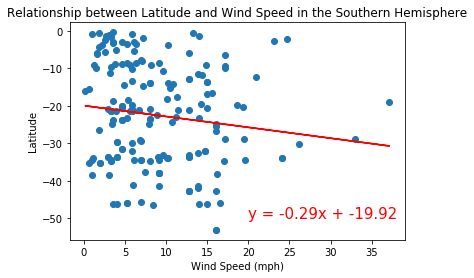

In [127]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.title('Relationship between Latitude and Wind Speed in the Southern Hemisphere')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

Observations and trends

1.	Once I reached the plotting portion of this assignment, I realized that zero degrees latitude was not in the middle of the x-axis on the first four plots. This was confusing me because the obvious point of this assignment was to find cities around the equator. Assuming that roughly half of the cities would be on either side, I thought it would be in the middle. It wasn’t until I created the separate dataframes for the northern and southern hemispheres that I realized where the majority of the cities were. It appears most of the cities were in the northern hemisphere. I actually went to Google Maps to see how the continents were laid out as it related to the equator. To the naked eye, it didn’t seem like the amount of cities in the northern half of the world would be that much more, but apparenty it is.

2.	One of the trends that jumped off the page to me was the relationship between latitude and cloudiness. I’ve not done many scatter plots, but my understanding is that the dots that make up the plot should be SCATTERED. With the cloudiness scatter plot, there were several very distinct lines throughout the chart. Being that we pulled real time data from OpenWeatherAPI, I wondered if those lines represented more than just clouds. We all know while there can be partly cloudy skies, often times clouds are representative of a bigger weather system. My observation, and perhaps a guess, is that those distinct lines could represent a larger weather system where clouds (and possible other weather phenomenon such as precipitation) stretch several hundred miles.

3.	My final observation ties to the previous observation in a way, but I didn’t arrive to the conclusion until I actually looked at the current weather conditions on weather.com. The scatter plot for latitude versus humidity in the northern hemisphere caught my attention because there was a cluster of points between approximately 40 degrees north latitude and 60 degrees north latitude. When I see the word humidity, I usually only think about sticky, “air you can wear” weather in the summer time. I also associate humidity with warmer climates. What I didn’t consider was that humidity is actually moisture in the air, NOT just hot, sticky weather. I went to Google Maps to see where 40-60 degrees north latitude landed on the map. If I’ve done it right, that area of high humidity starts just north of where we live in Central Indiana and reaches up into Canada. If I’m making an educated guess based on data, that humidity that I wonder about is part of the winter weather system passing through the Midwest that got my clothes wet as I walked to class on Saturday morning. Had I completed my scatter plot prior to Saturday morning, I may have thought differently about where I parked or what clothes I wore. Or maybe not… I did watch the news after all.